<a href="https://colab.research.google.com/github/Crisosth/DataMining/blob/main/AVALIA%C3%87%C3%83O_ADM_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Análise dos dados da qualidade do Leite**


Faça a análise de dados completa e teste de hipótese as recomendações nos blocos de desenvolvimento.

# **Informações da base de dados **
Previsão da Qualidade do Leite (Classificação)

O conjunto de dados consiste em 7 variáveis ​​independentes, ou seja, pH, temperatura, sabor, odor, gordura, turbidez e cor. Geralmente, o Grau ou Qualidade do leite depende desses parâmetros. Esses parâmetros desempenham um papel vital na análise preditiva do leite.

A variável de destino nada mais é do que o Grau do leite. Pode ser:

Baixo (ruim)

Médio (Moderado)

Alto (Bom)

Se Sabor, Odor, Gordura e Turbidez estiverem satisfeitos com as condições ideais, eles atribuirão 1, caso contrário, 0.
Temperatura e ph recebem seus valores reais no conjunto de dados.

Temos que realizar pré-processamento de dados e analise exploratória para construir modelos estatísticos e preditivos para prever a qualidade do leite.

In [ ]:
## ADICIONAR A BASE DE DADOS
from scipy.stats import normaltest
import pandas as pd
from scipy import stats

dados = pd.read_csv('milk.csv', sep=";")
dados.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
## LIMPEZA DE DADOS: VERIFICAR DADOS NULOS, OUTLIERS E OUTROS
dados.isnull().sum()
## Não há dados nulos

#explorar dados categoricos(Todos foram buscados da mesma maneira substituindo somente o valor dentro do parêntese)
##pH não tem outliers
##Temprature não tem outliers(Mas tem valores altos, principalmente o 90)
##Taste não tem outliers
##Odor não tem outliers
##Fat não tem outliers, porém tem um espaço no final do nome da coluna
##Turbidity não tem outliers
##Colour não tem outliers
##Grade não tem outliers


agrupado = dados.groupby(['Grade']).size()
agrupado

Grade
high       86
low       159
medium    135
dtype: int64

In [ ]:
## LIMPEZA DE DADOS: SE FALTAR DADOS, ATRIBUIR A MEDIANA PARA DADOS NUMERICOS E A MODA PARA DADOS CATEGÓRICOS

##Todos os dados já satisfazem valores ideais para a análise

In [ ]:
## ANÁLISE EXPLORATÓRIA: EXTRAIR A ESTATÍSTICA DESCRITIVA DADOS NUMÉRICOS DE CADA VARIÁVEL (PH E TEMPERATURA) EM RELAÇÃO AS CLASSES DA QUALIDADE
#divisao dos dados
pH = dados['pH']
Temprature = dados['Temprature']

pH.describe()

count    380.000000
mean       6.667632
std        1.401556
min        3.000000
25%        6.500000
50%        6.700000
75%        6.800000
max        9.500000
Name: pH, dtype: float64

In [ ]:
Temprature.describe()

count    380.000000
mean      44.860526
std       11.022836
min       34.000000
25%       38.000000
50%       41.500000
75%       45.000000
max       90.000000
Name: Temprature, dtype: float64

<ipython-input-12-4a6a4a7390a0>:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="Grade", y="pH",


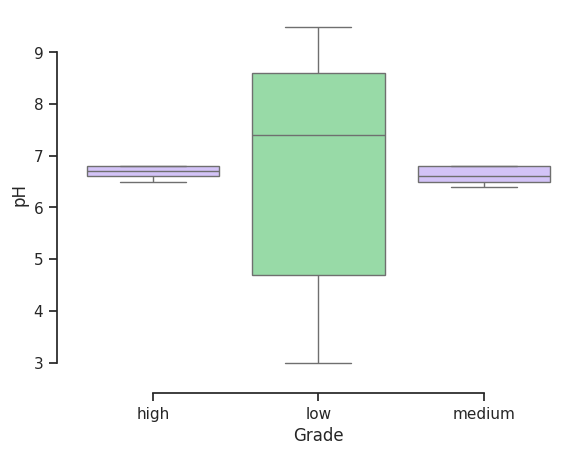

In [ ]:
## ANÁLISE EXPLORATÓRIA: EXPLORAR GRAFICAMENTE AS VARIÁVEIS COM OS DADOS NUMERICOS EM RELAÇÃO AO PROBLEMA DO ESTUDO (CLASSES DE QUALIDADE DO LEITE )(EX. BOXPLOT, DISPERSÃO, BOLHAS ...)
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Carregar o dataset
tips = dados

# Desenhar em tela um grafico de barras usando como variável categórica a qualidade pela variável numérica pH
sns.boxplot(x="Grade", y="pH",
            hue="Grade", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

<ipython-input-13-d32afc8c2cff>:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="Grade", y="Temprature",


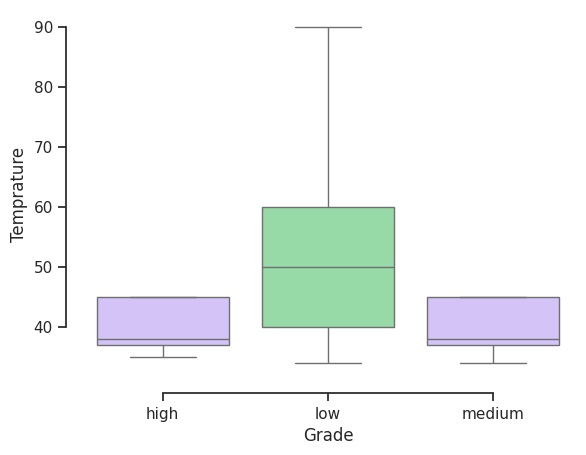

In [ ]:
# Carregar o dataset
tips = dados

# Desenhar em tela um grafico de barras usando como variável categórica a qualidade pela variável numérica pH
sns.boxplot(x="Grade", y="Temprature",
            hue="Grade", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

<Axes: xlabel='Grade', ylabel='Contagem'>

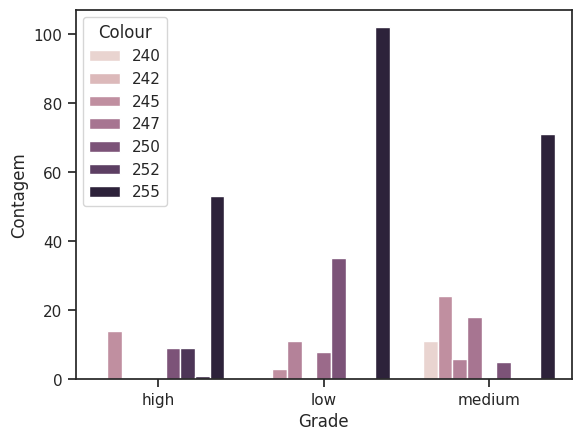

In [ ]:
##Gráfico para saber qual a classe que tem o leite com maior intensidade de cor
tips = dados

# Contando o número de ocorrências de cada combinação de Qualidade e Colour
df = pd.DataFrame(dados)
Contagem = df.groupby(['Grade', 'Colour']).size().reset_index(name='Contagem')

# Criando o gráfico de barras empilhadas
sns.barplot(x='Grade', y='Contagem', hue='Colour', data=Contagem)

##O leite com a maior intensidade de cor é o de baixa qualidade(low)

<ipython-input-20-68f5edbce852>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados['pH'])


<Axes: xlabel='pH', ylabel='Density'>

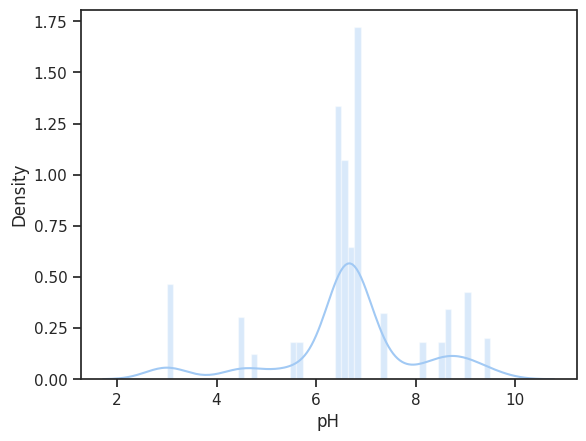

In [ ]:
##Faça o teste de normalidade dos dados numéricos
#teste de normalidade
normaltest(dados['pH'])

#p<alfa ou seja rejeitamos a H0

sns.distplot(dados['pH'])

<ipython-input-21-e0f7e556a5e8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados['Temprature'])


<Axes: xlabel='Temprature', ylabel='Density'>

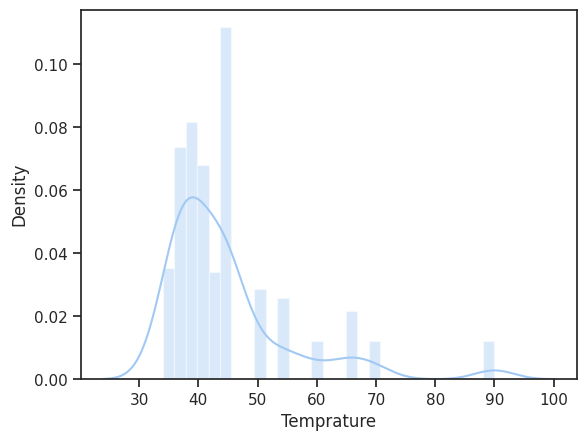

In [ ]:
normaltest(dados['Temprature'])
#p<alfa ou seja rejeita-se a H0

sns.distplot(dados['Temprature'])

In [ ]:
High= dados[dados.Grade == 'high']
Medium = dados[dados.Grade == 'medium']
Low = dados[dados.Grade == 'low']
High_pH = High['pH']
Medium_pH = Medium['pH']
Low_pH = Low['pH']

In [ ]:
##O teste ideal é o de Kruskal pois os dados são não-normais, não-pareados e são mais de 2 grupos
#teste Kruskal Wallis
stats.kruskal(High_pH, Medium_pH, Low_pH)

KruskalResult(statistic=7.899402827634747, pvalue=0.019260451821687122)

In [ ]:
##Faça o teste de hipótese adequado conforme a indicação do teste de normalidade, relacionando Temperatura x Grade
High_Temp = High['Temprature']
Medium_Temp = Medium['Temprature']
Low_Temp = Low['Temprature']

In [ ]:
stats.kruskal(High_Temp, Medium_Temp, Low_Temp)

KruskalResult(statistic=86.16423136761124, pvalue=1.9483855042131592e-19)

<Axes: xlabel='Grade', ylabel='Contagem'>

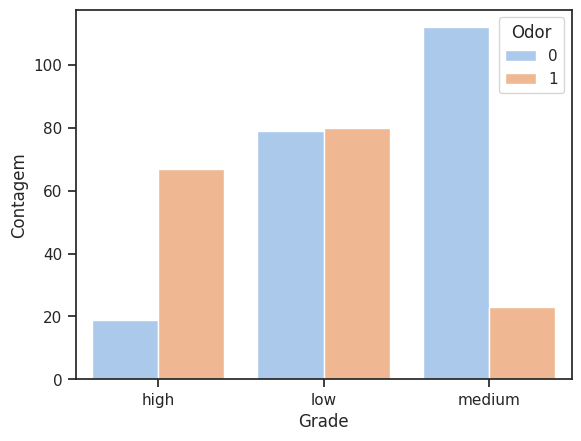

In [ ]:
##Gráfico para saber qual a classe que tem o leite com maior frequencia de odor
tips = dados

# Contando o número de ocorrências de cada combinação de Qualidade e Odor
df = pd.DataFrame(dados)
Contagem = df.groupby(['Grade', 'Odor']).size().reset_index(name='Contagem')

# Criando o gráfico de barras empilhadas
sns.barplot(x='Grade', y='Contagem', hue='Odor', data=Contagem)

##O leite com a maior frequencia de odor é o de baixa qualidade(low)

<Axes: xlabel='Grade', ylabel='Contagem'>

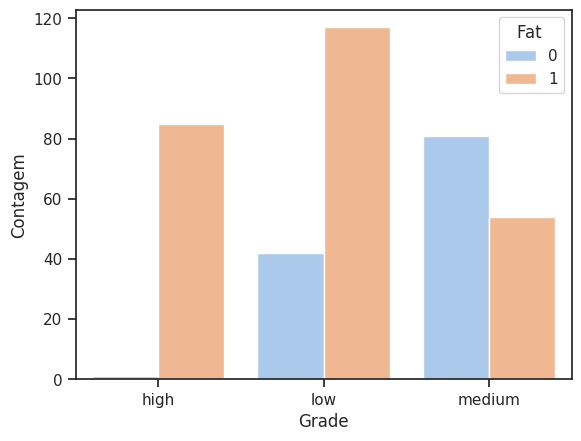

In [ ]:
##Gráfico para saber qual a classe que tem o leite é mais gorduroso
tips = dados

# Contando o número de ocorrências de cada combinação de Qualidade e Odor
df = pd.DataFrame(dados)
Contagem = df.groupby(['Grade', 'Fat ']).size().reset_index(name='Contagem')

# Criando o gráfico de barras empilhadas
sns.barplot(x='Grade', y='Contagem', hue='Fat ', data=Contagem)

##O leite mais gorduroso é o de baixa qualidade(low)

In [ ]:
### DESCREVA A CONCLUSÃO DA ANÁLISE, INFORMANDO QUAIS AS CARACTERÍSTICAS DE CADA CLASSE DO LEITE.

### Informe a média PH e Desvio padrão das classes do leite, apontando a classe que possui maior PH
##A média do PH é 6.6, o desvio padrão é 1.40, a classe que possui o maior pH é a classe low(baixa qualidade)

### Informe qual classe de leite possui maior frequencia de Odor e é mais gorduroso
##O leite com maior frequencia de odor é o low(baixa qualidade), o mesmo vale para o mais gorduroso, tamém é o low(baixa qualidade)

### Informe qual classe de leite possui maior PH e Temperatura, informe se tem diferenças significativas (TESTE DE HIPOTESE)
##A classe de leite que possui o maior pH é o de baixa qualidade(low) o teste de hipótese mostra que há uma diferença significativa entre as classes pois o valor de p é menor que alfa
##O mesmo se aplica a temperatura, o de baixa qualidade apresenta a maior temperatura e o teste de hipótese aponta o mesmo, diferença significativa tal que p é menor que alfa


### Verifique a maior frequencia de intesidade de cor na coloração do leite (os valores da variável Color são representados pela intensidade de pixel 0-255)
##A maior frequencia de intensidade da cor do leite é no de baixa quualidade(low), que pelo gráfico podemos ver que passa dos 100 registros


### Em resumo, o que Você identificou do padrão da qualidade do leite? Descreva uma resultado pontual.
##Foi possível verificar que o leite de baixa qualidade está muito fora do padrão no geral em comparação aos leites de média e alta qualidade
##No geral ele apresenta maiores taxas de valores fora do padrão se comparado com média e alta qualidade
##pH muito fora da média no geral, temperaturas mais elevadas, mais gorduroso, mais frequencia de cor são os principais pontos-
##-onde podemos ver diferenças significativas entre os leites de baixa qualidade com os demais.

